<a href="https://colab.research.google.com/github/tanishapatil971/commodities-price-prediction/blob/main/commodities_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **Load & Inspect**  **Data**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Load Data
df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully")
df.head()


Saving AgriCEP_dataset.csv to AgriCEP_dataset (2).csv
Dataset Loaded Successfully


,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs/Quintal),Max Price (Rs/Quintal),Modal Price (Rs/Quintal),maxtempC,mintempC,humidity,precipMM,cloudcover,Price Date
0,Pune,Pune,Wheat,Sharbati,FAQ,4000.0,4900.0,4500.0,24.7,18.2,75.0,0.0,40.0,2021-07-23 00:00:00
1,Pune,Pune,Wheat,Sharbati,FAQ,4000.0,4800.0,4400.0,22.8,16.6,75.0,0.0,36.0,2023-06-24 00:00:00
2,Pune,Pune,Wheat,Sharbati,FAQ,4100.0,5200.0,4650.0,30.2,24.7,57.0,1.8,64.0,2023-10-23 00:00:00
3,Pune,Pune,Wheat,Sharbati,FAQ,4000.0,5000.0,4500.0,16.4,9.6,82.0,0.0,24.0,2023-06-10 00:00:00
4,Pune,Pune,Wheat,Sharbati,FAQ,3600.0,4500.0,4100.0,30.2,23.4,44.0,0.0,50.0,2020-12-18 00:00:00


**Preprocessing**

In [ ]:
# Drop missing values
df = df.dropna()

# Convert date column to datetime
df['Price Date'] = pd.to_datetime(df['Price Date'], errors='coerce')

# Extract useful date features
df['Year'] = df['Price Date'].dt.year
df['Month'] = df['Price Date'].dt.month
df['Day'] = df['Price Date'].dt.day

# Target column
target_col = 'Modal Price (Rs/Quintal)'

# Encode categorical columns
categorical_cols = ['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Feature set
features = ['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
            'maxtempC', 'mintempC', 'humidity', 'precipMM', 'cloudcover',
            'Year', 'Month', 'Day']

X = df[features]
y = df[target_col]


**Train Test Split & Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=250, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


**Evaluate Model**

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Accuracy & Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score (Model Accuracy):", r2)


📌 Mean Absolute Error (MAE): 4.469906679324051
R² Score (Model Accuracy): 0.9889770179766509


**Prediction Plot**

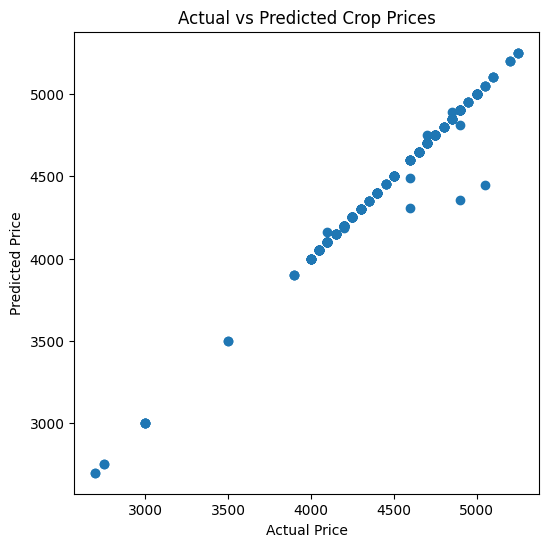

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Crop Prices")
plt.show()


**Predict Price for New Weather Conditions** **

In [ ]:
sample = pd.DataFrame([{
    'District Name': 0,
    'Market Name': 0,
    'Commodity': 0,         # 0 represent one crop (likely wheat)
    'Variety': 0,
    'Grade': 0,
    'maxtempC': 30,
    'mintempC': 18,
    'humidity': 65,
    'precipMM': 25,
    'cloudcover': 70,
    'Year': 2025,
    'Month': 11,
    'Day': 1
}])

pred = model.predict(sample)[0]
print(f"Predicted Modal Price: ₹{pred:.2f} per Quintal")


Predicted Modal Price: ₹4748.20 per Quintal
